
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: November 9, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jocelyne Walker (EID- jvw359)
2. Shruti Kolhatkar (EID-sgk637)

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [63]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

C:\Users\jocel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(226067, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [64]:
from sklearn.preprocessing import MinMaxScaler

y = df['loan_status'].values
X = df.drop(['loan_status'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1.2

100 components
 [0.09170821 0.06999716 0.0602589  0.05489894 0.04921268 0.04597757
 0.03851816 0.03388049 0.03215033 0.02880618 0.0281954  0.02293882
 0.02220701 0.01815067 0.01576705 0.01494582 0.01267545 0.01226264
 0.01180294 0.01163881 0.01098248 0.01082009 0.01053082 0.01014452
 0.00972286 0.00964481 0.0094866  0.00924945 0.00913445 0.00844365
 0.00832071 0.0081086  0.00797982 0.00792628 0.00753419 0.00711178
 0.00698748 0.00694632 0.00690821 0.0066288  0.00584701 0.00563868
 0.005316   0.00507763 0.00491489 0.0048995  0.00482193 0.00448456
 0.00446927 0.0040217  0.00391064 0.00383275 0.00375874 0.00365819
 0.00363689 0.00355144 0.00346764 0.00334729 0.00320123 0.00308354
 0.00278864 0.00259027 0.00247221 0.00245254 0.00243357 0.00241902
 0.00233291 0.00227157 0.00206856 0.00204655 0.00196682 0.0018561
 0.00169784 0.00165289 0.0016117  0.00149846 0.00145721 0.00144112
 0.00141671 0.00136576 0.00131103 0.00129171 0.00127867 0.0012089
 0.00119485 0.00108257 0.00103143 0.00100753 0.0

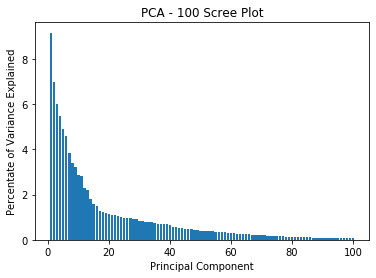

30 components
 [0.09170821 0.06999716 0.0602589  0.05489894 0.04921268 0.04597757
 0.03851815 0.03388048 0.03215032 0.02880616 0.02819538 0.02293873
 0.02220694 0.01815053 0.01576649 0.01494398 0.0126671  0.01224224
 0.01179211 0.01163321 0.01096668 0.01080953 0.01051988 0.01010616
 0.00970089 0.00961713 0.00935483 0.00918078 0.00901772 0.00833576]


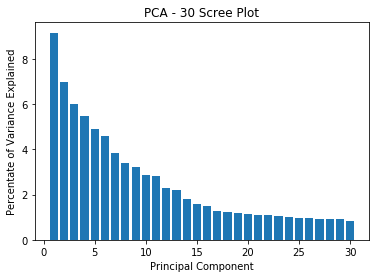

100 components
 [0.09170821 0.06999716 0.0602589  0.05489894 0.04921268 0.04597757
 0.03851816 0.03388048 0.03215032 0.02880615]


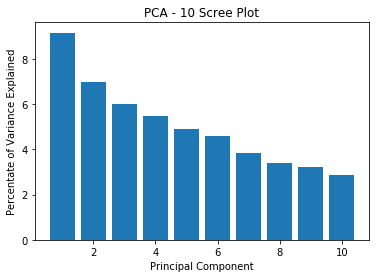

In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

pca_100 = PCA(n_components = 100)
pc_100 = pca_100.fit_transform(X_train)
pc_100_test = pca_100.transform(X_test)
print("100 components\n", pca_100.explained_variance_ratio_)
percent_variance = np.round(pca_100.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,101), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA - 100 Scree Plot')
plt.show()

pca_30 = PCA(n_components = 30)
pc_30 = pca_30.fit_transform(X_train)
pc_30_test = pca_30.transform(X_test)
print("30 components\n", pca_30.explained_variance_ratio_)
percent_variance = np.round(pca_30.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,31), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA - 30 Scree Plot')
plt.show()

pca_10 = PCA(n_components = 10)
pc_10 = pca_10.fit_transform(X_train)
pc_10_test = pca_10.transform(X_test)
print("100 components\n", pca_10.explained_variance_ratio_)
percent_variance = np.round(pca_10.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,11), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA - 10 Scree Plot')
plt.show()


### 1.3

In [4]:
# do we use training or testing data??????????????

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LogReg_160 = LogisticRegression(random_state=4, max_iter=10000)
fitted_X_160 = LogReg_160.fit(X_train, y_train)
pred_160 = LogReg_160.predict(X_train)
print("160-Dim X\n",classification_report(y_train,pred_160))

LogReg_100 = LogisticRegression(random_state=4, max_iter=10000)
fitted_X_100 = LogReg_100.fit(pc_100, y_train)
pred_100 = LogReg_100.predict(pc_100)
print("\n100-Dim X\n",classification_report(y_train,pred_100))

LogReg_30 = LogisticRegression(random_state=4, max_iter=10000)
fitted_X_30 = LogReg_30.fit(pc_30, y_train)
pred_30 = LogReg_30.predict(pc_30)
print("\n30-Dim X\n",classification_report(y_train,pred_30))

LogReg_10 = LogisticRegression(random_state=4, max_iter=10000)
fitted_X_10 = LogReg_10.fit(pc_10, y_train)
pred_10 = LogReg_10.predict(pc_10)
print("\n10-Dim X\n",classification_report(y_train,pred_10))


160-Dim X
               precision    recall  f1-score   support

           0       0.80      0.49      0.60      2488
           1       0.99      1.00      1.00    167062

    accuracy                           0.99    169550
   macro avg       0.89      0.74      0.80    169550
weighted avg       0.99      0.99      0.99    169550


100-Dim X
               precision    recall  f1-score   support

           0       0.74      0.24      0.37      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.87      0.62      0.68    169550
weighted avg       0.99      0.99      0.98    169550


30-Dim X
               precision    recall  f1-score   support

           0       0.29      0.04      0.07      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.98    169550
   macro avg       0.64      0.52      0.53    169550
weighted avg       0.98      0.98      0

C:\Users\jocel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



10-Dim X
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.49      0.50      0.50    169550
weighted avg       0.97      0.99      0.98    169550



### 1.4

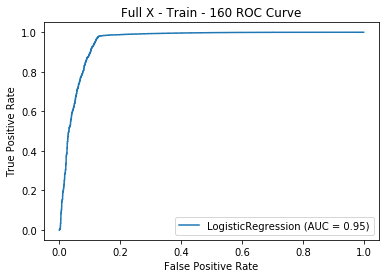

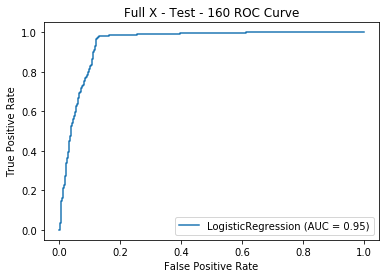

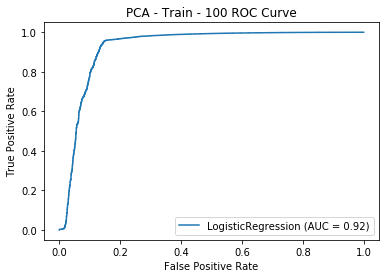

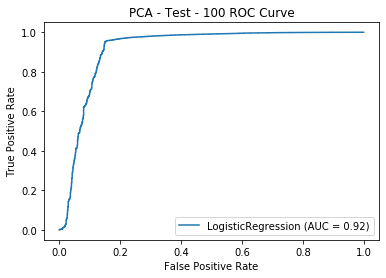

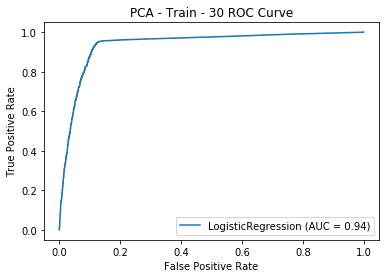

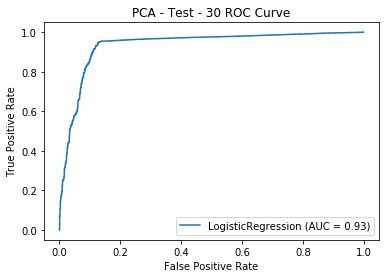

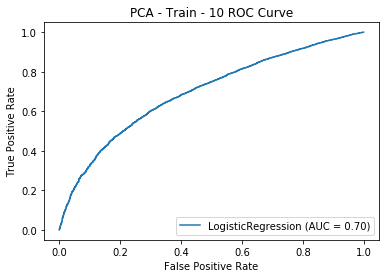

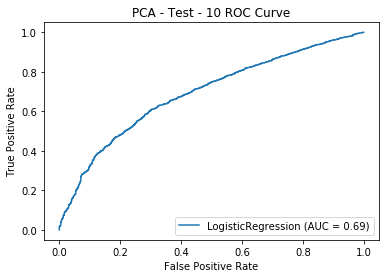

In [68]:
from sklearn.metrics import plot_roc_curve

LogReg_160_disp = plot_roc_curve(LogReg_160, X_train, y_train)
plt.title('Full X - Train - 160 ROC Curve')
plt.show()

LogReg_160_disp = plot_roc_curve(LogReg_160, X_test, y_test)
plt.title('Full X - Test - 160 ROC Curve')
plt.show()

LogReg_100_disp = plot_roc_curve(LogReg_100, pc_100, y_train)
plt.title('PCA - Train - 100 ROC Curve')
plt.show()

LogReg_100_disp = plot_roc_curve(LogReg_100, pc_100_test, y_test)
plt.title('PCA - Test - 100 ROC Curve')
plt.show()

LogReg_30_disp = plot_roc_curve(LogReg_30, pc_30, y_train)
plt.title('PCA - Train - 30 ROC Curve')
plt.show()

LogReg_30_disp = plot_roc_curve(LogReg_30, pc_30_test, y_test)
plt.title('PCA - Test - 30 ROC Curve')
plt.show()

LogReg_10_disp = plot_roc_curve(LogReg_10, pc_10, y_train)
plt.title('PCA - Train - 10 ROC Curve')
plt.show()

LogReg_10_disp = plot_roc_curve(LogReg_10, pc_10_test, y_test)
plt.title('PCA - Test - 10 ROC Curve')
plt.show()

### 1.5


From the ROC curves, we see that the 100 and 30 PCA models explain nearly the same amount of variance in the data as the full model. Only when we go to the 10 PCA model do we see a signiciant decline in the classification performance.

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [7]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [8]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [9]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [10]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt_1 = DecisionTreeClassifier(criterion='gini',max_depth=2).fit(X_train, Y_train)
print("\nGini - Max Depth 2")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='entropy',max_depth=2).fit(X_train, Y_train)
print("\nEntropy - Max Depth 2")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='gini',max_depth=5).fit(X_train, Y_train)
print("\nGini - Max Depth 5")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X_train, Y_train)
print("\nEntropy - Max Depth 5")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='gini',max_depth=10).fit(X_train, Y_train)
print("\nGini - Max Depth 10")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='entropy',max_depth=10).fit(X_train, Y_train)
print("\nEntropy - Max Depth 10")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='gini',max_depth=20).fit(X_train, Y_train)
print("\nGini - Max Depth 20")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='entropy',max_depth=20).fit(X_train, Y_train)
print("\nEntropy - Max Depth 20")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='gini',max_depth=None).fit(X_train, Y_train)
print("\nGini - Max Depth None")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))

dt_1 = DecisionTreeClassifier(criterion='entropy',max_depth=None).fit(X_train, Y_train)
print("\nEntropy - Max Depth None")
print("Train accuracy: ",dt_1.score(X_train, Y_train))
print("Test accuracy: ", dt_1.score(X_test,Y_test))


Gini - Max Depth 2
Train accuracy:  0.7285250307985217
Test accuracy:  0.7268248992386923

Entropy - Max Depth 2
Train accuracy:  0.7119498264083324
Test accuracy:  0.7089117778772951

Gini - Max Depth 5
Train accuracy:  0.7976257139657297
Test accuracy:  0.7760859829825347

Entropy - Max Depth 5
Train accuracy:  0.7998656064508903
Test accuracy:  0.7783251231527094

Gini - Max Depth 10
Train accuracy:  0.8632545637809386
Test accuracy:  0.786833855799373

Entropy - Max Depth 10
Train accuracy:  0.8500391981184903
Test accuracy:  0.7895208240035826

Gini - Max Depth 20
Train accuracy:  0.984320752603875
Test accuracy:  0.7371249440214958

Entropy - Max Depth 20
Train accuracy:  0.9629297793705902
Test accuracy:  0.7429467084639498

Gini - Max Depth None
Train accuracy:  1.0
Test accuracy:  0.7308553515450067

Entropy - Max Depth None
Train accuracy:  1.0
Test accuracy:  0.7344379758172862


## (b)



As we increase the tree depth, the training accuracy approaches 1.0 and eventually reaches perfect classification. As we increase the depth of the tree, the testing accuracy improves up until about depth 10, and after that the model is overfit and the testing accuracy begins to fall.

# (c)

                Columns  Feature Importances
0                   age             0.000000
1               balance             0.000000
2              duration             0.849306
3              campaign             0.000000
4              previous             0.000000
5           default_cat             0.000000
6           housing_cat             0.000000
7              loan_cat             0.000000
8            job_admin.             0.000000
9       job_blue-collar             0.000000
10     job_entrepreneur             0.000000
11        job_housemaid             0.000000
12       job_management             0.000000
13          job_retired             0.000000
14    job_self-employed             0.000000
15         job_services             0.000000
16          job_student             0.000000
17       job_technician             0.000000
18       job_unemployed             0.000000
19          job_unknown             0.000000
20     marital_divorced             0.000000
21      ma

[Text(167.4, 181.2, 'X[2] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(83.7, 108.72, 'X[29] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(41.85, 36.23999999999998, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(209.25, 36.23999999999998, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(292.95, 36.23999999999998, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

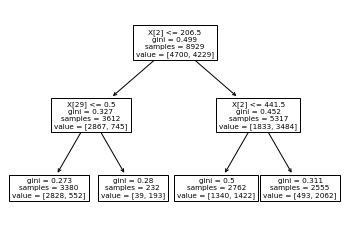

In [12]:
from sklearn import tree
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=2).fit(X_train, Y_train)

print(pd.DataFrame({'Columns':X_train.columns,
                    'Feature Importances':dt2.feature_importances_}))
tree.plot_tree(dt2)

## (d)

Test accuracy:  0.7268248992386923

Test AUC: 0.733621258183339


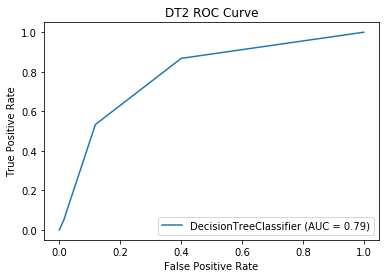

In [13]:
print("Test accuracy: ", dt2.score(X_test,Y_test))

from sklearn.metrics import (auc, roc_auc_score, plot_roc_curve)

y_pred = dt2.predict(X_test)

auc_test = roc_auc_score(Y_test, y_pred)
print("\nTest AUC:", auc_test)

DT2_disp = plot_roc_curve(dt2, X_test, Y_test)
plt.title('DT2 ROC Curve')
plt.show()

# Question 3 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

**Part A**

In [14]:
from sklearn import preprocessing

df = pd.read_csv('vehicle.csv')

print(df['class'])

le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])
print(df['class'])

y = df['class'].values
X = df.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=50)

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object
0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 846, dtype: int32


**Part B**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                 ('scaler', StandardScaler()), 
                 ('dt', DecisionTreeClassifier())])

print(pipe.fit(X_train, y_train))
print(pipe.predict(X_test))
print('\nTest set classification accuracy',pipe.score(X_test, y_test))

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        

**Part C**

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                 ('scaler', StandardScaler()), 
                 ('pca', PCA()),
                 ('clf', DecisionTreeClassifier())
                ])

grid_clf = GridSearchCV(pipe, param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]})
grid_fit = grid_clf.fit(X_train, y_train)

#Print the best parameters found by gridsearch. 
print(grid_fit.best_params_)

best_clf = grid_fit.best_params_

#Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), 
pipe['pca'].set_params(n_components = best_clf['pca__n_components'])

#and report the classification accuracy on test set.
grid_clf = GridSearchCV(pipe, param_grid={'clf__max_depth': [3, 5, 15]})
grid_fit = grid_clf.fit(X_train, y_train)
print('\nTest set classification accuracy: ', grid_fit.score(X_test, y_test))


{'clf__max_depth': 15, 'pca__n_components': 10}

Test set classification accuracy:  0.8352941176470589


# Question 4 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

![](https://imgur.com/KeiPNUj.png)

Once we know the decision threshold, we also have to consider the cost of rejection. We plotted all three lines on the graph below.

* For P(C1|x) < 0.333, choose C2.

* For P(C1|x) between 0.333 and 0.5, reject.

* For P(C1|x) > 0.5, choose C1.

![](https://i.imgur.com/tV8bjm5.jpg)

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (7th topic onwards, i.e. "stochastic gradient descent" onwards). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 7, write 7A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

**We liked most:**
8B - Neural Networks - Authors: Matthew Leong, Qianhui Lian, India Lindsay


**Why we liked it and what we learned:**
 
**1. Explanation about the comparision with neuron and neural network:**
The comparision and the similarities between an actual neuron and a neural network was clearly explained with the help of 'synapse,' 'dendrite,' and 'cell body' with input variables, weights, and summed up weight respectively which was really helpful. Neural networks are D dimensional with respect to input layer and have M hidden layers. After receiving the inputs, the weights are summed up and then passed through a nonlinear activation function, typically a hyperbolic or sigmoid function. This explanation allowed us to compare it to a real world scenario.

 **2. The note was really helpful in terms of simple explanation:**
The note further gives a deeper understanding of linear transformations. It occurs within linear neural network simply with vector notation as $x_1$,$x_2$...$x_n$ which is represented graphically. Also, the vector notation is not just scalar vectors but a combination of different things.

**3. The explanation is more understandable with the help of the figures:**
The figures included in the note were very clear and helped us understand the concept in detail.
Overall, this note did a wonderful job of moving from foundational understanding to more complex understanding with a good mix of mathematical and verbal exaplanations.

**How this note may be further improved:**
The paragraph about History of Adaptive Linear Elements has accidentally included a name by mistake. So, the note can be further improved on formating by thorough proof-reading. The mathematical example of input variable with the weighted sum would have really helped in understanding the flow more clearly. Also, a simple real-world scenario or example where practically we use neural network might help visualize neural network more clearly.
